In [1]:
# Import Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Load Dataset

In [3]:
df = pd.read_csv('train.csv')
df

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
...,...,...,...
119995,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...
119996,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...
119997,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...
119998,2,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...


In [4]:
# View Column Headers

df.columns

Index(['Class Index', 'Title', 'Description'], dtype='object')

In [5]:
# Check for null values in the dataset

df.isna().any()

Class Index    False
Title          False
Description    False
dtype: bool

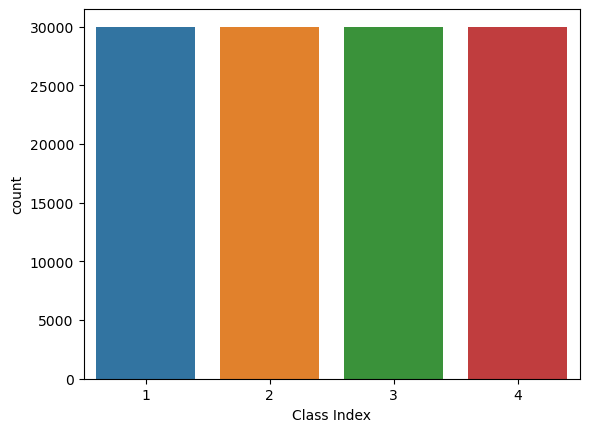

In [6]:
# Plot the target class distribution

sns.countplot(x = 'Class Index', data = df)
plt.show()

TF-IDF 

In [7]:
# Term frequency-inverse document frequency is a text vectorizer that can be used to vectorize text into a format more agreeable for ML & NLP techniques

# create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# vectorize the text data
# feature
X = vectorizer.fit_transform(df['Description'])
# target
y = df['Class Index']

Model Training - Linear SVC

In [8]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train a SVM classifier on the training data
clf = SVC(kernel='linear').fit(X_train, y_train)

Model Testing

In [9]:
# make predictions on the test data
y_pred = clf.predict(X_test)

Model Evaluation


Accuracy:  90.904 %

Classification Report:
               precision    recall  f1-score   support

           1       0.92      0.89      0.91      5956
           2       0.95      0.98      0.96      6058
           3       0.88      0.88      0.88      5911
           4       0.89      0.89      0.89      6075

    accuracy                           0.91     24000
   macro avg       0.91      0.91      0.91     24000
weighted avg       0.91      0.91      0.91     24000


Confusion Matrix:



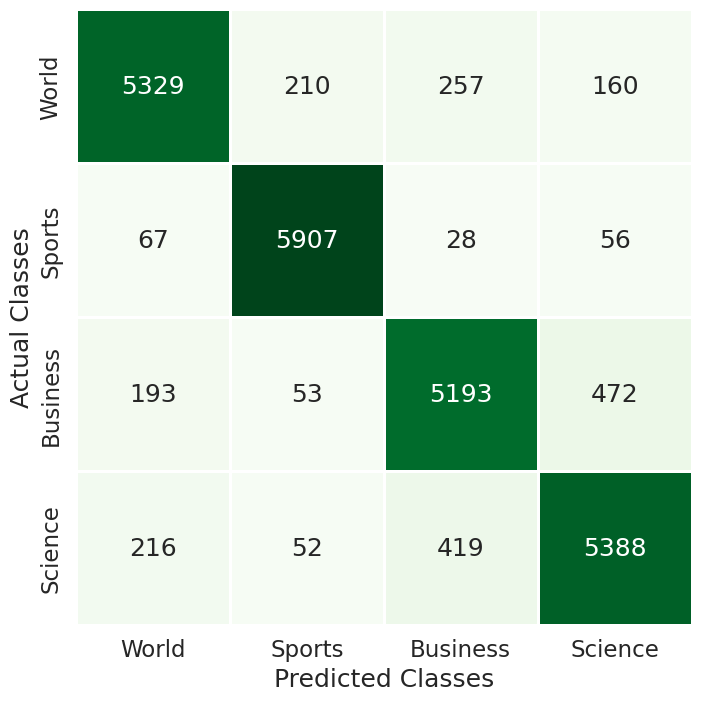

In [10]:
# evaluate the performance of the classifier

accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy: ",round(accuracy*100,3),"%")

report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

print("\nConfusion Matrix:\n")
matrix = confusion_matrix(y_test, y_pred)
matrix =pd.DataFrame(matrix, index=[i for i in range(1,5)], columns=[i for i in range(1,5)])
sns.set(font_scale=1.5)
plt.figure(figsize=(8,8));
sns.heatmap(matrix, cmap='Greens',linewidths=1, annot=True,square=True, fmt='d', cbar=False,xticklabels=['World','Sports','Business','Science'],yticklabels=['World','Sports','Business','Science']);
plt.xlabel("Predicted Classes");
plt.ylabel("Actual Classes");